# Example for ROC and Precison-recall curves
Adopted from [Jason Brownlee's blog post](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

# Load Cancer data set
X, Y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, Y,\
    test_size=0.2, random_state=934)

# Train model
model = LogisticRegression(max_iter=10000)
model = model.fit(X_train, y_train)

## Accuracy

In [60]:
print(accuracy_score(y_test, model.predict(X_test)))

0.9473684210526315


## Calculate AUC

In [61]:
from sklearn.metrics import roc_auc_score

# Probabilities of the second class
lr_probs = model.predict_proba(X_test)[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('AUC: %.3f' % lr_auc)

AUC: 0.986


## Naive prediction

In [64]:
# generate a no skill prediction (majority class)
common_label = int(round(sum(y_train)/len(y_train)))
ns_probs = [common_label for _ in range(len(y_test))]

ns_auc = roc_auc_score(y_test, ns_probs)
print('AUC: %.3f' % ns_auc)

AUC: 0.500


## Calculate ROC curves

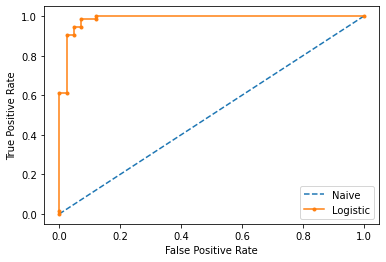

In [66]:
from sklearn.metrics import roc_curve

# FPR and TPR along thresholds
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Naive')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Definitions
* **Precision** = **Positive Predictive Power** = $\frac{TP}{TP+FP}$
* **Recall** = **Sensitivity** = $\frac{TP}{TP+FN}$ 
* $F_1 = 2\cdot \frac{Precision\cdot Recall}{Precision+Recall}=\frac{TP}{TP+\frac{1}{2}(FP+FN)}$

In imbalanced setting, we may be less likely intrested in predicting correctly class 0 where the there is a large number of class 0 examples. 

Precision and recall are calculations that do not make use of the true negatives. It is only concerned with the correct prediction of the minority class (class 1).



> While the baseline is fixed with ROC, the baseline of [precision-recall curve] is determined by the ratio of positives (P) and negatives (N) as y = P / (P + N). For instance, we have y = 0.5 for a balanced class distribution



In [67]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score, auc

# predict class values (not probabilities)
yhat = model.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# Naive value
ns_precision, ns_recall, _ = precision_recall_curve(y_test, ns_probs)
ns_f1, ns_auc = f1_score(y_test, ns_probs), auc(ns_recall, ns_precision)

## Summarize scores

In [51]:
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('Naive: f1=%.3f auc=%.3f' % (ns_f1, ns_auc))

Logistic: f1=0.959 auc=0.991
Naive: f1=0.774 auc=0.816


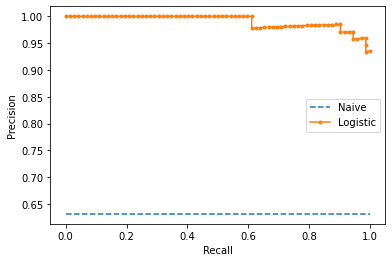

In [52]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Naive')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Imbalanced example

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.716


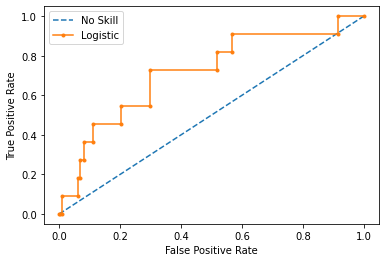

In [53]:
# roc curve and auc on an imbalanced dataset
from sklearn.datasets import make_classification

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99,0.01], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

In [55]:
# summarize dataset
print('Dataset: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Train: Class0=%d, Class1=%d' % (len(trainy[trainy==0]), len(trainy[trainy==1])))
print('Test: Class0=%d, Class1=%d' % (len(testy[testy==0]), len(testy[testy==1])))

Dataset: Class0=985, Class1=15
Train: Class0=496, Class1=4
Test: Class0=489, Class1=11


## ROC Curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.716


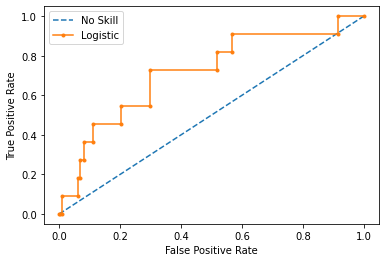

In [56]:
# generate a naive prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression()
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Precision-Recall for Imbalaned example

Logistic: f1=0.000 auc=0.054


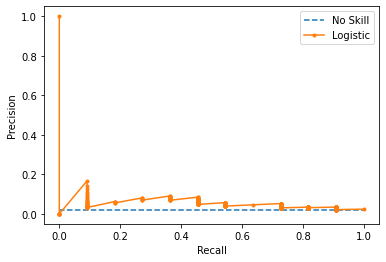

In [54]:
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

The plot of the precision-recall curve highlights that the model is just barely above the no skill line for most thresholds.

This is possible because the model predicts probabilities and is uncertain about some cases. These get exposed through the different thresholds evaluated in the construction of the curve, flipping some class 0 to class 1, offering some precision but very low recall.